In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./scaleData4.csv", encoding='unicode_escape')
data['Tree_Type'] = pd.Categorical(data['Tree_Type'])

In [3]:
data

,Tree_Type,Total_Rainfall,Max_Temp,Total_Sunlight_Hours,Continentality_Index,Aspect,Slope,Soil_Drainage,Elevation
0,Birch,0.616885,0.950211,1.068172,-3.546670,-0.546633,-0.298658,-0.101340,-1.680292
1,Birch,0.631733,0.893061,1.064464,-3.545062,-0.546633,0.126682,-0.101340,-1.475736
2,Birch,0.624579,0.917826,1.063117,-3.544434,-0.546633,0.272948,-0.101340,-1.645337
3,Birch,0.649511,0.809619,1.043035,-3.535525,-1.017494,-0.016739,0.479590,-1.403469
4,Birch,0.633588,0.871113,1.047244,-3.537353,-1.017494,-0.456912,-0.101340,-1.587375
...,...,...,...,...,...,...,...,...,...
76945,Birch,-1.120370,0.987865,3.020303,-0.301251,-0.546633,-0.935050,-0.134100,-1.013980
76946,Birch,-0.849795,-0.230213,2.896902,-0.630250,-0.075772,-1.172902,-0.343416,-0.233438
76947,Birch,-1.148905,1.094829,3.100447,-0.300942,-1.017494,-0.595248,0.203744,-1.084941
76948,Birch,-1.150027,1.095443,3.105821,-0.301838,-1.017494,-0.551664,0.203744,-1.073643


In [4]:
X = data.drop('Tree_Type', axis = 1)
y = data[['Tree_Type']]
label_encoder = LabelEncoder()
y['Tree_Type'] = label_encoder.fit_transform(y['Tree_Type'])
y.value_counts(normalize=True)


C:\Users\lagoodal\AppData\Local\Temp\ipykernel_1760\2511919625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Tree_Type'] = label_encoder.fit_transform(y['Tree_Type'])


Tree_Type
2            0.488720
0            0.385718
1            0.125562
Name: proportion, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [6]:
# Print class distribution before resampling
class_distribution = data['Tree_Type'].value_counts()
class_distribution

Tree_Type
Scots Pine      37607
Birch           29681
Oak Woodland     9662
Name: count, dtype: int64

In [7]:
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=33)

In [8]:
param_grid = {
    'n_estimators' : [130,140,150,160,170],
    'max_depth' : [7,8,9,10,11],
    'min_samples_split' : [1,2,3],
    'min_samples_leaf' : [1,2,3],
    'max_leaf_nodes' : [None, 3,5,7],
    'max_samples' : [None, 0.2, 0.5]
}

In [9]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

In [10]:
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=stratified_kfold, scoring="f1_weighted")

In [11]:
grid_search_rf.fit(X_train, y_train.values.ravel())

c:\Users\lagoodal\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4500 fits failed out of a total of 13500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lagoodal\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lagoodal\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\lagoodal\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=33, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=33),
             param_grid={'max_depth': [7, 8, 9, 10, 11],
                         'max_leaf_nodes': [None, 3, 5, 7],
                         'max_samples': [None, 0.2, 0.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [130, 140, 150, 160, 170]},
             scoring='f1_weighted')

In [12]:
best_params_rf = grid_search_rf.best_params_
print(f"\nBest Hyperparameters: {best_params_rf}")


Best Hyperparameters: {'max_depth': 11, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 170}


In [13]:
best_rf_classifier = grid_search_rf.best_estimator_

In [14]:
y_pred_rf = best_rf_classifier.predict(X_test)

In [15]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      6017
           1       0.82      0.74      0.78      1945
           2       0.91      0.97      0.94      7428

    accuracy                           0.89     15390
   macro avg       0.87      0.85      0.86     15390
weighted avg       0.89      0.89      0.89     15390



In [16]:
f1 = f1_score(y_test, y_pred_rf, average = 'weighted')
print(f"\nWeighted F1 Score: {f1:.4f}")


Weighted F1 Score: 0.8870


In [17]:
from sklearn.metrics import confusion_matrix
y_pred = best_rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[5052,  319,  646],
       [ 479, 1443,   23],
       [ 243,    5, 7180]], dtype=int64)

Text(33.22222222222222, 0.5, 'True Value')

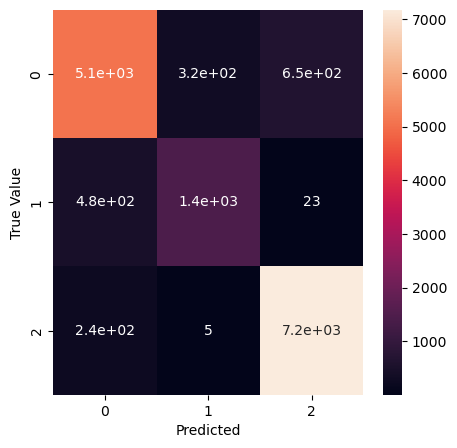

In [18]:
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Value')

In [19]:
# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search_rf.best_params_)

# Use the best model for prediction
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))


y_pred_proba_rf = best_model_rf.predict_proba(X_test)
# For multi-class classification, you need to specify the average parameter
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
print("ROC AUC Score:", roc_auc_rf)

Best hyperparameters:  {'max_depth': 11, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 170}
Accuracy on test set: 88.86%
ROC AUC Score: 0.9727148285359905


In [20]:
X_test

,Total_Rainfall,Max_Temp,Total_Sunlight_Hours,Continentality_Index,Aspect,Slope,Soil_Drainage,Elevation
69944,-0.94,-0.09,0.93,1.01,1.81,0.04,-0.13,0.24
61228,-0.72,-1.95,-0.47,1.02,-1.02,-0.23,-0.34,1.63
9693,1.29,-0.21,-2.15,-1.31,-0.55,0.01,2.58,-0.50
20496,0.39,-0.33,-0.92,0.52,-1.02,-0.12,1.07,0.17
28466,1.43,1.30,0.64,-0.88,1.81,2.14,-0.05,-1.49
...,...,...,...,...,...,...,...,...
25307,1.83,0.47,-1.12,-0.49,-1.49,-0.34,1.07,-0.45
11519,1.79,-0.60,-1.29,-1.46,-1.02,2.62,-0.55,0.43
67831,-0.50,-1.83,0.11,0.96,-1.02,-0.42,-0.34,1.73
17189,0.76,-0.82,-1.36,-0.19,-1.02,-0.01,1.07,-0.29


In [21]:
scenario1Df = pd.read_csv('./scaleScenario1.csv')
scenario1RF = best_rf_classifier.predict(scenario1Df)
scenario1RF = pd.DataFrame(scenario1RF, columns=['Predicted_Class'])
scenario1RF.to_csv('./scenario1RFFinished.csv')

scenario2Df = pd.read_csv('./scaleScenario2.csv')
scenario2RF = best_rf_classifier.predict(scenario2Df)
scenario2RF = pd.DataFrame(scenario2RF, columns=['Predicted_Class'])
scenario2RF.to_csv('./scenario2RFFinished.csv')

scenario3Df = pd.read_csv('./scaleScenario3.csv')
scenario3RF = best_rf_classifier.predict(scenario3Df)
scenario3RF = pd.DataFrame(scenario3RF, columns=['Predicted_Class'])
scenario3RF.to_csv('./scenario3RFFinished.csv')

scenario4Df = pd.read_csv('./scaleScenario4.csv')
scenario4RF = best_rf_classifier.predict(scenario4Df)
scenario4RF = pd.DataFrame(scenario4RF, columns=['Predicted_Class'])
scenario4RF.to_csv('./scenario4RFFinished.csv')

# XGBoost

In [22]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

In [23]:
data = pd.read_csv("./scaleData4.csv", encoding='unicode_escape')
data['Tree_Type'] = pd.Categorical(data['Tree_Type'])
X = data.drop('Tree_Type', axis = 1)
y = data[['Tree_Type']]
label_encoder = LabelEncoder()
y['Tree_Type'] = label_encoder.fit_transform(y['Tree_Type'])
y

C:\Users\lagoodal\AppData\Local\Temp\ipykernel_1760\3807379791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Tree_Type'] = label_encoder.fit_transform(y['Tree_Type'])


,Tree_Type
0,0
1,0
2,0
3,0
4,0
...,...
76945,0
76946,0
76947,0
76948,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [25]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), n_jobs = -1)

In [26]:
param_grid = {
    'learning_rate': [0.15, 0.2,0.3,0.4],
    'n_estimators': [150,160,170,180,190,200],
    'max_depth': [4, 5, 7],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0.35,0.4,0.45],
    'lambda': [0.8,1,1.2]
}

In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=33)

In [28]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_log_loss', cv=kf)

In [29]:
grid_search_xgb.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=33, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     int...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_class=3,
                                     num_parallel_tree=None, ...),
             param_grid={'alpha': [0.35, 0.4, 0.45],
                         'colsample_bytree': [0.8, 0.9, 1.0],
                         'lambda': [0.8, 1, 1.2],
                         'learning_rate': [0.15, 0.2, 0.3, 0.4],
                         'max_depth': [4, 5, 7],
                         'n_estimators': [150, 160, 170, 180, 190, 200],
                         'subsample': [0.5, 0.6, 0.7]},
             scoring='neg_log_loss')

In [30]:
from sklearn.metrics import confusion_matrix
y_pred_xgb = grid_search_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)
cm

array([[5564,  166,  287],
       [ 251, 1684,   10],
       [ 111,    5, 7312]], dtype=int64)

Text(33.22222222222222, 0.5, 'True Value')

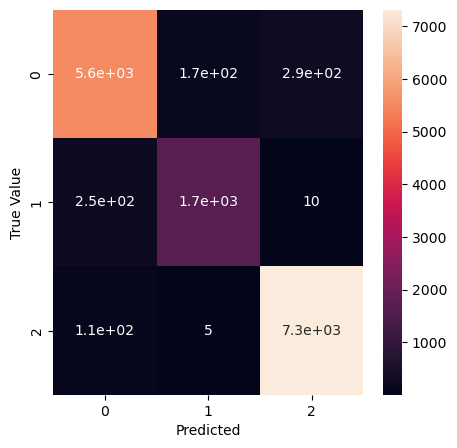

In [31]:
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Value')

In [32]:
print("Best Hyperparameters:", grid_search_xgb.best_params_)
print("Best Negative Log Loss:", grid_search_xgb.best_score_)

# Use the best model for predictions
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))

# Evaluate the model using ROC AUC on the test set
# Assuming you have a separate test set X_test, y_test
y_pred_proba_xgb = best_model_xgb.predict_proba(X_test)
# For multi-class classification, you need to specify the average parameter
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
print("ROC AUC Score:", roc_auc)

Best Hyperparameters: {'alpha': 0.45, 'colsample_bytree': 1.0, 'lambda': 0.8, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Best Negative Log Loss: -0.165540331215066
Accuracy on test set: 94.61%
ROC AUC Score: 0.9910851274182516


In [33]:
f1 = f1_score(y_test, y_pred_xgb, average = 'weighted')
print(f"\nWeighted F1 Score: {f1:.4f}")


Weighted F1 Score: 0.9457


In [34]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6017
           1       0.91      0.87      0.89      1945
           2       0.96      0.98      0.97      7428

    accuracy                           0.95     15390
   macro avg       0.94      0.92      0.93     15390
weighted avg       0.95      0.95      0.95     15390



In [35]:
scenario1Df = pd.read_csv('./scaleScenario1.csv')
scenario1XGB = best_model_xgb.predict(scenario1Df)
scenario1XGB = pd.DataFrame(scenario1XGB, columns=['Predicted_Class'])
scenario1XGB.to_csv('./scenario1XGBFinished.csv')

scenario2Df = pd.read_csv('./scaleScenario2.csv')
scenario2XGB = best_model_xgb.predict(scenario2Df)
scenario2XGB = pd.DataFrame(scenario2XGB, columns=['Predicted_Class'])
scenario2XGB.to_csv('./scenario2XGBFinished.csv')

scenario3Df = pd.read_csv('./scaleScenario3.csv')
scenario3XGB = best_model_xgb.predict(scenario3Df)
scenario3XGB = pd.DataFrame(scenario3XGB, columns=['Predicted_Class'])
scenario3XGB.to_csv('./scenario3XGBFinished.csv')

scenario4Df = pd.read_csv('./scaleScenario4.csv')
scenario4XGB = best_model_xgb.predict(scenario4Df)
scenario4XGB = pd.DataFrame(scenario4XGB, columns=['Predicted_Class'])
scenario4XGB.to_csv('./scenario4XGBFinished.csv')

# ANN

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [37]:
data = pd.read_csv("./scaleData4.csv", encoding='unicode_escape')
data['Tree_Type'] = pd.Categorical(data['Tree_Type'])
X = data.drop('Tree_Type', axis = 1)
y = data[['Tree_Type']]
label_encoder = LabelEncoder()
y['Tree_Type'] = label_encoder.fit_transform(y['Tree_Type'])
y

C:\Users\lagoodal\AppData\Local\Temp\ipykernel_1760\3807379791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Tree_Type'] = label_encoder.fit_transform(y['Tree_Type'])


,Tree_Type
0,0
1,0
2,0
3,0
4,0
...,...
76945,0
76946,0
76947,0
76948,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [39]:
mlp = MLPClassifier(max_iter=500)

In [40]:
param_grid = {
    'hidden_layer_sizes': [(30,40,30,40), (40,40,40,40), (20,30,40,50), (40,20,40,20)],
    'activation': ['relu', 'tanh', 'identity', 'logistic'],
    'solver' : ['sgd', 'adam'],
    'alpha': [0.001],
    'learning_rate_init': [0.0001, 0.001],
    'early_stopping' : [True]
}

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_ann = GridSearchCV(mlp, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [42]:
grid_search_ann.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'identity', 'logistic'],
                         'alpha': [0.001], 'early_stopping': [True],
                         'hidden_layer_sizes': [(30, 40, 30, 40),
                                                (40, 40, 40, 40),
                                                (20, 30, 40, 50),
                                                (40, 20, 40, 20)],
                         'learning_rate_init': [0.0001, 0.001],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [43]:
# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search_ann.best_params_)

# Use the best model for prediction
best_model_ann = grid_search_ann.best_estimator_
y_pred_ann = best_model_ann.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ann)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))


y_pred_proba_ann = best_model_ann.predict_proba(X_test)
# For multi-class classification, you need to specify the average parameter
roc_auc_ann = roc_auc_score(y_test, y_pred_proba_ann, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
print("ROC AUC Score:", roc_auc_ann)

Best hyperparameters:  {'activation': 'tanh', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (40, 40, 40, 40), 'learning_rate_init': 0.001, 'solver': 'adam'}
Accuracy on test set: 91.40%
ROC AUC Score: 0.9799128019264408


In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred_ann))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      6017
           1       0.84      0.74      0.79      1945
           2       0.95      0.97      0.96      7428

    accuracy                           0.91     15390
   macro avg       0.89      0.87      0.88     15390
weighted avg       0.91      0.91      0.91     15390



In [45]:
scenario1Df = pd.read_csv('./scaleScenario1.csv')
scenario1ANN = best_model_ann.predict(scenario1Df)
scenario1ANN = pd.DataFrame(scenario1ANN, columns=['Predicted_Class'])
scenario1ANN.to_csv('./scenario1ANNFinished.csv')

scenario2Df = pd.read_csv('./scaleScenario2.csv')
scenario2ANN = best_model_ann.predict(scenario2Df)
scenario2ANN = pd.DataFrame(scenario2ANN, columns=['Predicted_Class'])
scenario2ANN.to_csv('./scenario2ANNFinished.csv')

scenario3Df = pd.read_csv('./scaleScenario3.csv')
scenario3ANN = best_model_ann.predict(scenario3Df)
scenario3ANN = pd.DataFrame(scenario3ANN, columns=['Predicted_Class'])
scenario3ANN.to_csv('./scenario3ANNFinished.csv')

scenario4Df = pd.read_csv('./scaleScenario4.csv')
scenario4ANN = best_model_ann.predict(scenario4Df)
scenario4ANN = pd.DataFrame(scenario4ANN, columns=['Predicted_Class'])
scenario4ANN.to_csv('./scenario4ANNFinished.csv')